In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [27]:
df = pd.read_csv("tictac_final.txt", header=None, sep=" ")

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [29]:
df.shape

(958, 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       958 non-null    int64
 1   1       958 non-null    int64
 2   2       958 non-null    int64
 3   3       958 non-null    int64
 4   4       958 non-null    int64
 5   5       958 non-null    int64
 6   6       958 non-null    int64
 7   7       958 non-null    int64
 8   8       958 non-null    int64
 9   9       958 non-null    int64
dtypes: int64(10)
memory usage: 75.0 KB


In [31]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [32]:
df[9].value_counts()

9
 1    626
-1    332
Name: count, dtype: int64

In [38]:
X = df.iloc[0:, 0:9]
y = df.iloc[0:, 9]

In [37]:
X.shape

(958, 9)

In [39]:
y.shape

(958,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=101)

In [41]:
lg = LogisticRegression()

In [42]:
lg.fit(X_train, y_train)

LogisticRegression()

In [44]:
lg.score(X_train, y_train)

0.9830287206266318

In [45]:
lg.score(X_test, y_test)

0.984375

Accuracy: 0.984
Precision: 0.977
Recall: 1.000
F1 Score: 0.988


Text(113.9222222222222, 0.5, 'predicted label')

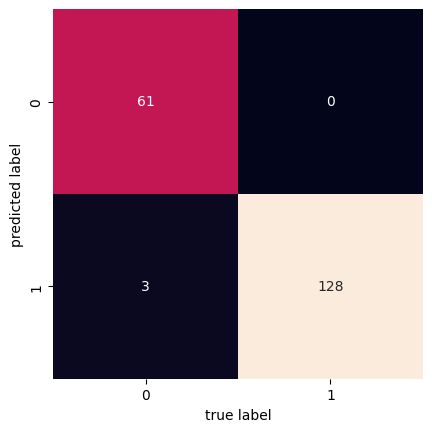

In [47]:
from sklearn import metrics
# Accuracy and Confusion Matrix for test data
accuracy = metrics.accuracy_score(y_test, lg.predict(X_test))
print("Accuracy: %.3f" % accuracy)

precision = metrics.precision_score(y_test, lg.predict(X_test))
print("Precision: %.3f" % precision)

recall = metrics.recall_score(y_test, lg.predict(X_test))
print("Recall: %.3f" % recall)

f1 = metrics.f1_score(y_test, lg.predict(X_test))
print("F1 Score: %.3f" % f1)

cm = metrics.confusion_matrix(y_test, lg.predict(X_test))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

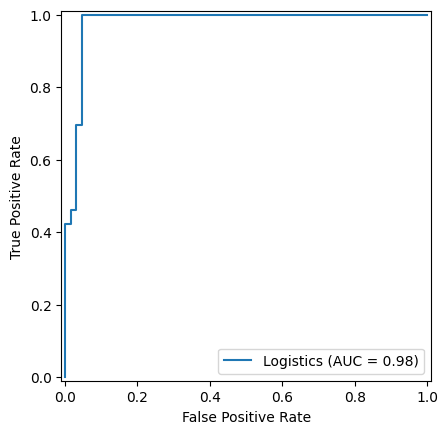

In [50]:
# Plot ROC/AUC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,lg.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='Logistics')
display.plot()

plt.show()